# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_250_800_dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_250_800_dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(250 -> 800)
  (3): nn.Dropout(0.500000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 5.2290194213193)
('Valid Perplexity: ', 42.4463160604)
('Test Perplexity: ', 42.100021143901)


### Loss vs. Epoch

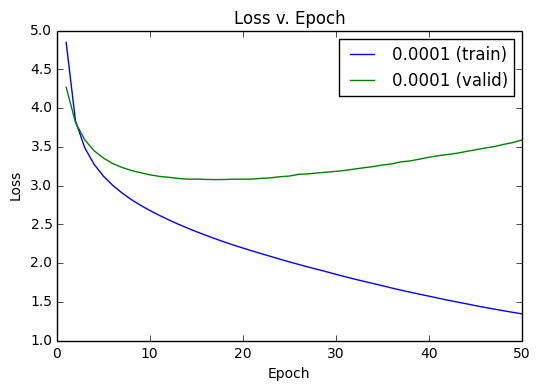

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

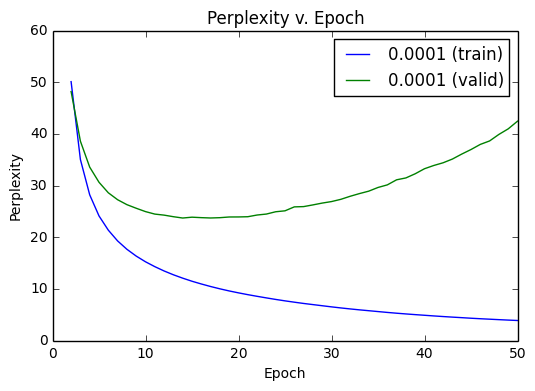

In [9]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0][1:], logs[k][3][1:], label=str(k) + ' (train)')
    plt.plot(logs[k][0][1:], logs[k][4][1:], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  creamy cashew alfredo pasta [ vegan , gluten - free ] <begin_ingredients> 1 medium red pepper or 1 cup roasted red pepper , diced <ing> 4 cups dried pasta ( choose gluten - free if you’re avoiding gluten ) <ing> 2 big garlic cloves <ing> 1 / 2 cup raw cashews or sunflower seeds <ing> 1 cup almond milk or any milk alternative <ing> ¼ cup nutritional yeast <ing> 2 tbsp tamari <ing> 1 tbsp tahini <ing> 1 tbsp lemon juice ( 1 / 4 lemon ) <ing> 2 tsp dijon mustard <ing> ½ tsp paprika <ing> 1 pinch nutmeg <ing> ½ – 1 tsp red pepper flakes to taste <ing> black pepper to taste <ing> 2 tbsp coconut oil <ing> 1 cup sundried tomatoes , diced <ing> 1 cup spinach , diced <end>

Gend:  <beg> 1 . place the cauliflower florets into a large pot and cover with water . bring to a boil . <step> 2 . cook the potatoes for 10 minutes until soft , then drain and rinse under cold water . <step> 2 . meanwhile , make the dressing . combine the olive oil , garlic

True:  1 . if you are roasting the red pe

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  chana masala <begin_ingredients> onion , chopped <ing> garlic clove , sliced <ing> chopped peeled ginger <ing> vegetable oil <ing> cardamom pods <ing> curry powder <ing> 28 - oz . can peeled whole tomatoes with their juices , crushed <ing> 15 - oz . can chickpeas , rinsed <ing> kosher salt and freshly ground black pepper <ing> kosher salt and freshly ground black pepper <ing> cooked basmati rice ( for serving ) <ing> chopped fresh cilantro ( for serving ) <end>

Gend:  <beg> heat a large skillet over medium - high heat . add oil and swirl to coat . add onion and garlic and sauté until tender , about 5 minutes . add garlic and cook until fragrant , about 1 minute . add wine and cook , stirring occasionally , until mixture is slightly thickened ,

True:  cook onion , garlic , and ginger in oil with cardamom and curry powder until onion is soft , 8–10 minutes . add tomatoes with their juices and chickpeas and simmer until soft , 25–30 minutes ; season with salt and pepper . serve 

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  vegan green bean casserole <begin_ingredients> 2 1 / 2 cups soymilk , plain <ing> 1 1 / 2 cups mushrooms , sliced <ing> 4 ( 14 ounce ) cans cut green beans <ing> 1 1 / 2 tablespoons cornstarch <ing> 15 ounces french - fried onions <ing> 1 - 2 teaspoon garlic powder <ing> fresh ground black pepper , to taste <end>

Gend:  <beg> preheat oven to 350 degrees . <step> lightly oil a large baking sheet . <step> combine all ingredients in a bowl . <step> shape into patties . <step> fry in skillet until brown and crispy on the outside . <step> serve with tartar sauce . <end> if you want to add a little more pepper

True:  preheat the oven to 350 degrees . <step> in a pot over medium - high heat , add 2c of the soy milk , the sliced mushrooms , garlic , and black pepper . slowly bring to a boil and reduce the heat to a simmer . dissolve the corn starch into the remaining ½c of soy milk and add to the pot . stir well for 5 minutes and remove from the heat . <step> drain the beans and pour